# EXPLORATORY DATA ANALYSIS


In [1]:
#First import all the necessary libraries and resources.
import pandas as pd
import numpy as np 
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [2]:
#Import our dataset
df = pd.read_csv('C:/Users/Personal/Desktop/Python/Taxi.csv', nrows=20000)

In [3]:
#A simple view of our dataset
df.head

<bound method NDFrame.head of                                  key  fare_amount          pickup_datetime  \
0        2009-06-15 17:26:21.0000001          4.5  2009-06-15 17:26:21 UTC   
1        2010-01-05 16:52:16.0000002         16.9  2010-01-05 16:52:16 UTC   
2       2011-08-18 00:35:00.00000049          5.7  2011-08-18 00:35:00 UTC   
3        2012-04-21 04:30:42.0000001          7.7  2012-04-21 04:30:42 UTC   
4      2010-03-09 07:51:00.000000135          5.3  2010-03-09 07:51:00 UTC   
...                              ...          ...                      ...   
19995  2011-02-22 20:07:00.000000233          6.1  2011-02-22 20:07:00 UTC   
19996   2013-11-04 22:45:00.00000065         38.5  2013-11-04 22:45:00 UTC   
19997    2015-05-30 20:50:45.0000004         22.0  2015-05-30 20:50:45 UTC   
19998   2011-09-02 12:40:00.00000072         12.5  2011-09-02 12:40:00 UTC   
19999    2011-07-17 14:27:35.0000002          8.9  2011-07-17 14:27:35 UTC   

       pickup_longitude  pickup_l

We shall first generate new features in our dataset which include;
1. Pickup hour - from pickup_datetime
2. Pickup week day name
3. Pickup date
4. Pickup month
5. Pickup day of week in numbers.

In [4]:
df['pickup_datetime'] = pd.to_datetime(df.pickup_datetime)

In [5]:
df.loc[:, 'pickup_hour'] = df['pickup_datetime'].dt.hour
df.loc[:, 'pickup_weekday'] = df['pickup_datetime'].dt.day_name()
df.loc[:, 'pickup_date'] = df['pickup_datetime'].dt.day
df.loc[:, 'pickup_month'] = df['pickup_datetime'].dt.month
df.loc[:, 'pickup_day'] = df['pickup_datetime'].dt.dayofweek

# Haversine Distance

Haversine distance: To calculate the distance (km) between pickup and dropoff points. Difference between pickup and dropoff points will give an idea about the distances covered which should be the most predictive feature for taxi fare. The haversine formula determines the great-circle distance between two points on a sphere given their longitudes and latitudes.

Haversine distance can be found using geopy library, scikitleran library, or by implementing Haversine formula by defining a custom made function. All three methods are described below.

# calculating the haversine distance

In [6]:
def haversine_distance(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

df['haversine_distance'] = haversine_distance(df['pickup_latitude'].values, 
                                                     df['pickup_longitude'].values, 
                                                     df['dropoff_latitude'].values, 
                                                     df['dropoff_longitude'].values)


In [7]:
df['haversine_distance'].median(), df['haversine_distance'].mean(), 

(2.1376102906000582, 16.66238177640721)

We know check if the haversine distance has been calculated for every row in our dataset

In [8]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,pickup_weekday,pickup_date,pickup_month,pickup_day,haversine_distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,17,Monday,15,6,0,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,16,Tuesday,5,1,1,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0,Thursday,18,8,3,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,4,Saturday,21,4,5,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,7,Tuesday,9,3,1,1.999157


From the above dataframe we can see that the haversine distance has been calculated and the features we generated previously where also added.

# Illustration of Trends in Time of pickups

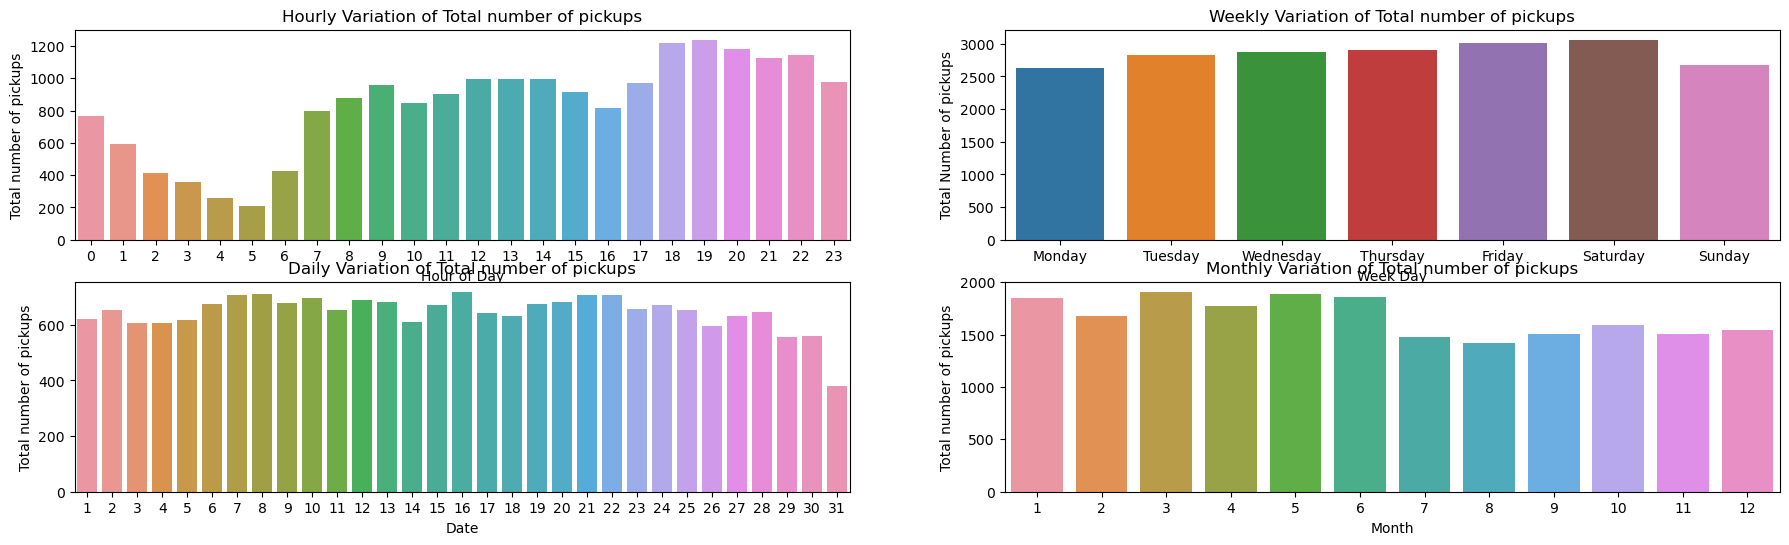

In [9]:
plt.figure(figsize=(22, 6))

# Hour of day
plt.subplot(221)
sb.countplot(df['pickup_hour'])
plt.xlabel('Hour of Day')
plt.ylabel('Total number of pickups')
plt.title('Hourly Variation of Total number of pickups')

# Date
plt.subplot(223)
sb.countplot(df['pickup_date'])
plt.xlabel('Date')
plt.ylabel('Total number of pickups')
plt.title('Daily Variation of Total number of pickups')

# Day of week
plt.subplot(222)
sb.countplot(df['pickup_weekday'], order = ['Monday', 'Tuesday', 'Wednesday', 
                                           'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlabel('Week Day')
plt.ylabel('Total Number of pickups')
plt.title('Weekly Variation of Total number of pickups')

# Month
plt.subplot(224)
sb.countplot(df['pickup_month'])
plt.xlabel('Month')
plt.ylabel('Total number of pickups')
plt.title('Monthly Variation of Total number of pickups');

# Box plots

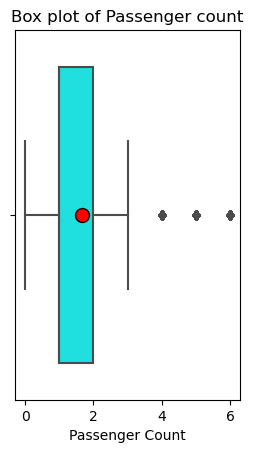

In [10]:
plt.subplot(122)
sb.boxplot(df['passenger_count'], color = 'cyan', showmeans=True, 
           meanprops={"marker":"o", "markerfacecolor":"Red", 
                      "markeredgecolor":"black","markersize":"10"}
)
plt.xlabel('Passenger Count')
plt.title('Box plot of Passenger count');

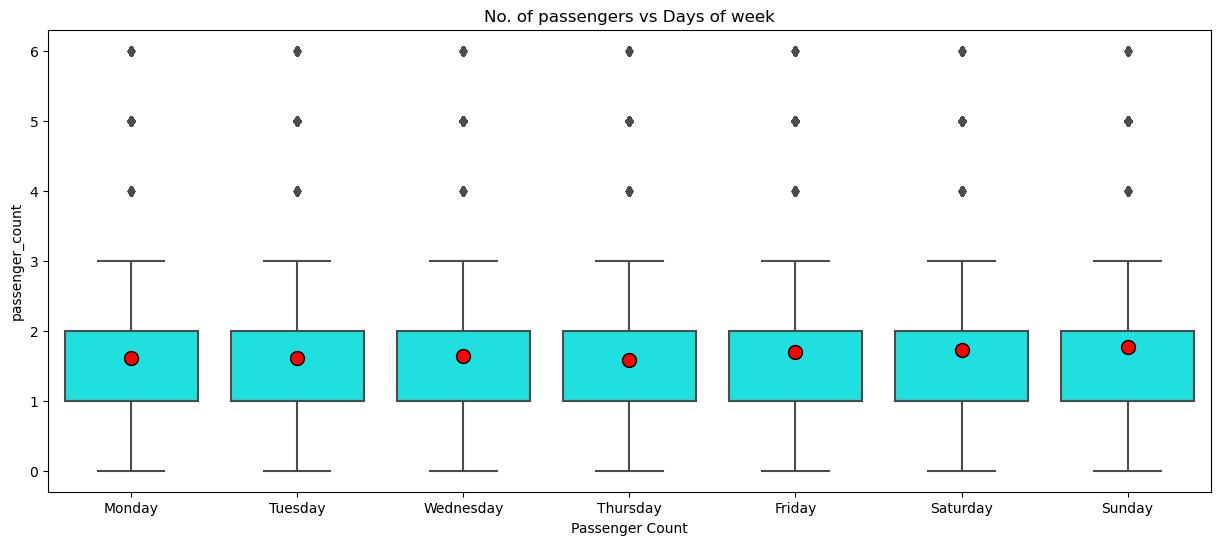

In [11]:
plt.figure(figsize=(15, 6))
sb.boxplot(x = df['pickup_weekday'], order = ['Monday', 'Tuesday', 'Wednesday', 
                                           'Thursday', 'Friday', 'Saturday', 'Sunday'],y = df['passenger_count'], color = 'cyan', showmeans=True, 
            meanprops={"marker":"o", "markerfacecolor":"Red", "markeredgecolor":"black","markersize":"10"}
)
plt.xlabel('Passenger Count')
plt.title ("No. of passengers vs Days of week");

# Outlier Plots

Outliers can be dealt in three different ways as follows:

1. Replace using central tendancy (median for continuous values and mode for categorical values)
2. Replace using Whisker values
3. Selecting only those within whisker values.

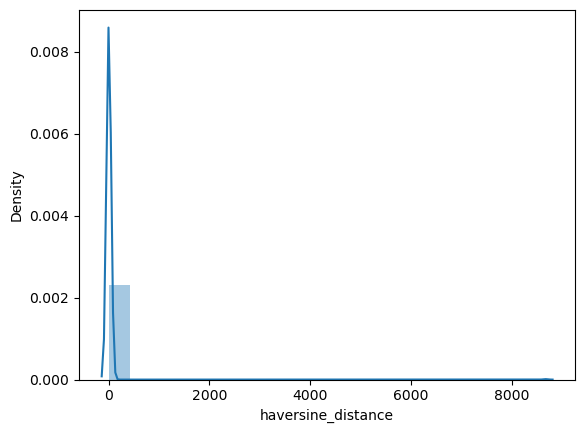

In [12]:
sb.distplot(df['haversine_distance'], bins = 20);

In [13]:
df['haversine_distance'].quantile(0.25), df['haversine_distance'].quantile(0.75)

(1.2213102936722577, 3.8599204410615764)

In [14]:
IQR = df['haversine_distance'].quantile(0.75) - df['haversine_distance'].quantile(0.25)
IQR

2.6386101473893184

In [15]:
Q1 = df['haversine_distance'].quantile(0.25)
Q3 = df['haversine_distance'].quantile(0.75)
whisker_1 = Q1 - (1.5*IQR)
whisker_2 = Q3 + (1.5*IQR)

whisker_1, whisker_2

(-2.7366049274117197, 7.817835662145554)

Replacing outliers with whisker values is one of the methods of treating outliers. Values at the lower end should be imputed by the lower whisker (i.e., Q1-1.5* IQR) and the values at the upper end should be imputed by the upper whisker (ie., Q3+1.5* IQR). Here selecting only those rows containing distance values within upper whisker.

In [16]:
df = df.loc[(df['haversine_distance']!=0) & (df['haversine_distance']<8)]
df.shape

(17763, 14)

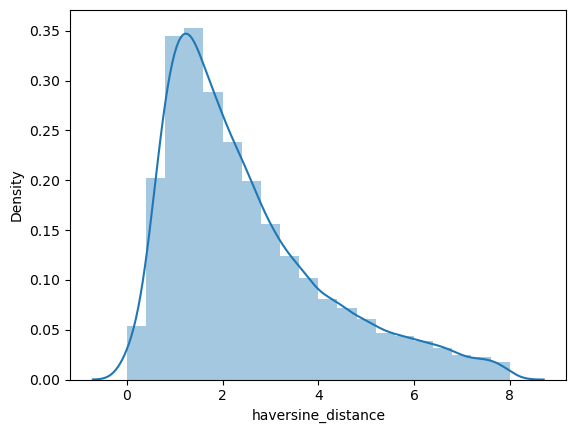

In [17]:
sb.distplot(df['haversine_distance'], bins = 20)
plt.show()

# Heatmap

Text(0.5, 1.0, 'TAXI FARE PREDICTION')

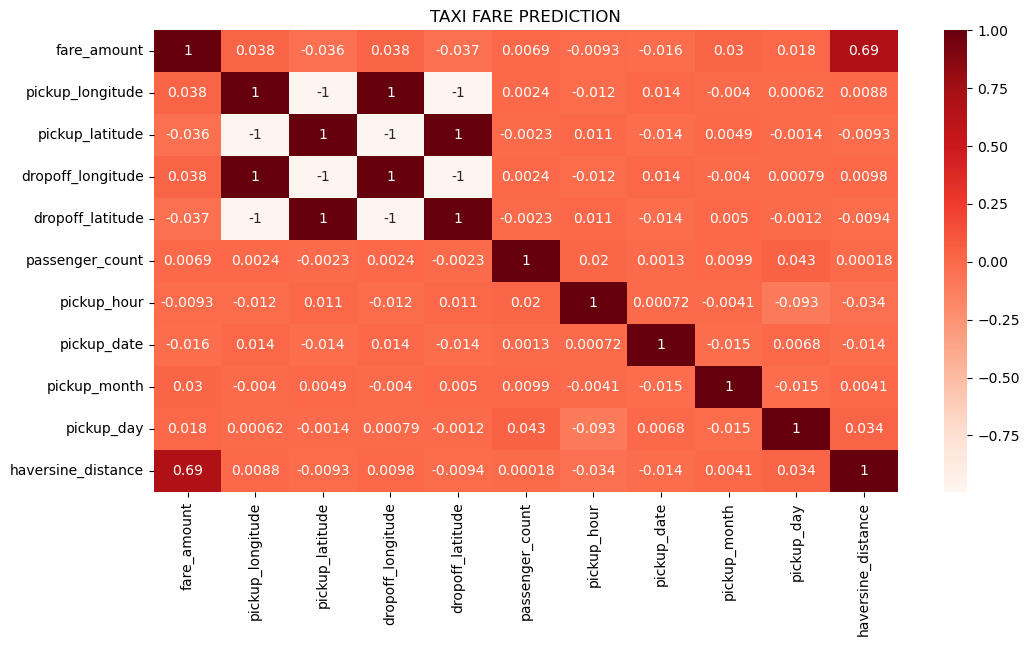

In [18]:
plt.figure(figsize = (12,6))
sb.heatmap(df.drop(['key', 'pickup_datetime','pickup_weekday'], axis = 1).corr(), 
           cmap ='Reds', annot = True);
plt.title("TAXI FARE PREDICTION")

# Correlation Matrix

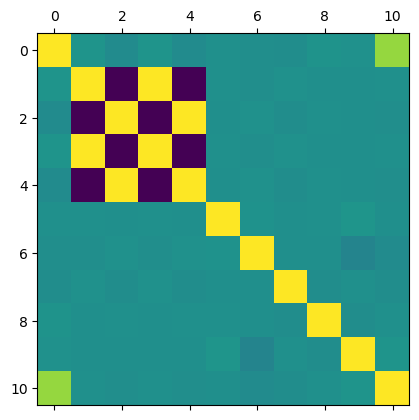

In [19]:
plt.matshow(df.corr())
plt.show()


# DATA CLEANING

In [20]:
df.shape

(17763, 14)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17763 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   key                 17763 non-null  object             
 1   fare_amount         17763 non-null  float64            
 2   pickup_datetime     17763 non-null  datetime64[ns, UTC]
 3   pickup_longitude    17763 non-null  float64            
 4   pickup_latitude     17763 non-null  float64            
 5   dropoff_longitude   17763 non-null  float64            
 6   dropoff_latitude    17763 non-null  float64            
 7   passenger_count     17763 non-null  int64              
 8   pickup_hour         17763 non-null  int64              
 9   pickup_weekday      17763 non-null  object             
 10  pickup_date         17763 non-null  int64              
 11  pickup_month        17763 non-null  int64              
 12  pickup_day          17763 non-nu

In [22]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,pickup_date,pickup_month,pickup_day,haversine_distance
count,17763.000000,17763.000000,17763.000000,17763.000000,17763.000000,17763.000000,17763.000000,17763.000000,17763.000000,17763.000000,17763.000000
mean,9.209908,-73.917515,40.691505,-73.915997,40.691568,1.658954,13.554355,15.678602,6.232506,3.034791,2.481198
std,5.204457,2.640838,2.600324,2.641007,2.599847,1.286771,6.480837,8.673552,3.452329,1.957873,1.679487
min,-3.000000,-74.229138,-74.006893,-74.227047,-74.006377,0.000000,0.000000,1.000000,1.000000,0.000000,0.000111
25%,5.700000,-73.992690,40.737288,-73.991747,40.737459,1.000000,9.000000,8.000000,3.000000,1.000000,1.223874
50%,8.000000,-73.982382,40.753295,-73.981396,40.754212,1.000000,14.000000,16.000000,6.000000,3.000000,2.011602
75%,11.000000,-73.970040,40.767146,-73.968191,40.767592,2.000000,19.000000,23.000000,9.000000,5.000000,3.309690
max,165.000000,40.766125,41.035688,40.802437,41.032598,6.000000,23.000000,31.000000,12.000000,6.000000,7.999309


Exploring for uniqueness in values

In [23]:
df.nunique()

key                   17763
fare_amount             247
pickup_datetime       17697
pickup_longitude      15195
pickup_latitude       15802
dropoff_longitude     15273
dropoff_latitude      15811
passenger_count           7
pickup_hour              24
pickup_weekday            7
pickup_date              31
pickup_month             12
pickup_day                7
haversine_distance    17763
dtype: int64

Check for missing values

In [24]:
df.isnull().sum()

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count       0
pickup_hour           0
pickup_weekday        0
pickup_date           0
pickup_month          0
pickup_day            0
haversine_distance    0
dtype: int64

check for duplicate values

In [25]:
df.duplicated().sum()

0

# Training and fitting a model.

In [26]:
pip install -q --upgrade linear-tree

Note: you may need to restart the kernel to use updated packages.


In [27]:
X = df.drop(['key', 'pickup_datetime','pickup_weekday', 'dropoff_latitude', 'dropoff_longitude'], 
            axis = 1)
y = df['fare_amount']

In [28]:
from sklearn import preprocessing
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.90500136,  0.02772079,  0.01146574, -0.51211343,  0.53168166,
        -0.07824023, -0.06734941, -1.55008854, -0.86364153],
       [-0.67442324, -0.02469851,  0.02683003,  0.26504769, -2.09150997,
         0.26764857,  0.51198595, -0.01777051, -0.65002191],
       [-0.29012639, -0.02636166,  0.01601299, -0.51211343, -1.47428841,
         0.61353738, -0.64668476,  1.00377485,  0.18939192],
       [-0.75128261, -0.01915352,  0.02942131, -0.51211343, -1.01137224,
        -0.77001784, -0.93635244, -1.03931586, -0.28702494],
       [ 0.5553267 , -0.0316003 ,  0.01543112, -0.51211343, -0.70276146,
        -1.11590665, -1.51568779, -0.01777051,  0.77766477]])

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.ndim)
print(y_train.ndim)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

2
1
(12434, 9)
(12434,)
(5329, 9)
(5329,)


In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
np.mean(cross_val_score(lr, X_train, y_train, cv=5))

1.0

In [31]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(lr, X_train, y_train, cv=5, return_estimator=True)

Coefficient = []
for model in cv_results['estimator']:
    Coefficient.append(model.coef_)
df_train = df.drop(['key', 'pickup_datetime','pickup_weekday', 'fare_amount', 
                    'dropoff_latitude', 'dropoff_longitude'], axis = 1)
coefficient = pd.DataFrame(Coefficient)
abs(coefficient.mean(axis =0)).sort_values(ascending = False)

0    5.204310e+00
1    3.826269e-15
2    2.003914e-15
8    5.877354e-16
7    2.757238e-16
6    2.686119e-16
3    1.064245e-16
4    8.291094e-17
5    5.523026e-17
dtype: float64

# Model Evaluation

In [32]:
def model_train_evaluation(y, ypred, model_name): 
       
    # Model Evaluation metrics
    from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score, mean_absolute_percentage_error
    print("\n \n Model Evaluation Report: ")
    print('Mean Absolute Error(MAE) of', model_name,':', mean_absolute_error(y, ypred))
    print('Mean Squared Error(MSE) of', model_name,':', mean_squared_error(y, ypred))
    print('Root Mean Squared Error (RMSE) of', model_name,':', mean_squared_error(y, ypred, squared = False))
    print('Mean absolute percentage error (MAPE) of', model_name,':', mean_absolute_percentage_error(y, ypred))
    print('Explained Variance Score (EVS) of', model_name,':', explained_variance_score(y, ypred))
    print('R2 of', model_name,':', (r2_score(y, ypred)).round(2))
    print('\n \n')
    
    # Actual vs Predicted Plot
    f, ax = plt.subplots(figsize=(12,6),dpi=100);
    plt.scatter(y, ypred, label="Actual vs Predicted")
    # Perfect predictions
    plt.xlabel('Fare amount')
    plt.ylabel('Fare amount')
    plt.title('Expection vs Prediction')
    plt.plot(y,y,'r', label="Perfect Expected Prediction")
    plt.legend()
    f.text(0.95, 0.06, 'AUTHOR: RINI CHRISTY',
         fontsize=12, color='green',
         ha='left', va='bottom', alpha=0.5);
    plt.show()


 
 Model Evaluation Report: 
Mean Absolute Error(MAE) of Linear regression Model : 2.7079818301112724e-14
Mean Squared Error(MSE) of Linear regression Model : 1.6048711939203768e-27
Root Mean Squared Error (RMSE) of Linear regression Model : 4.006084364963345e-14
Mean absolute percentage error (MAPE) of Linear regression Model : 0.05404391067742994
Explained Variance Score (EVS) of Linear regression Model : 1.0
R2 of Linear regression Model : 1.0

 



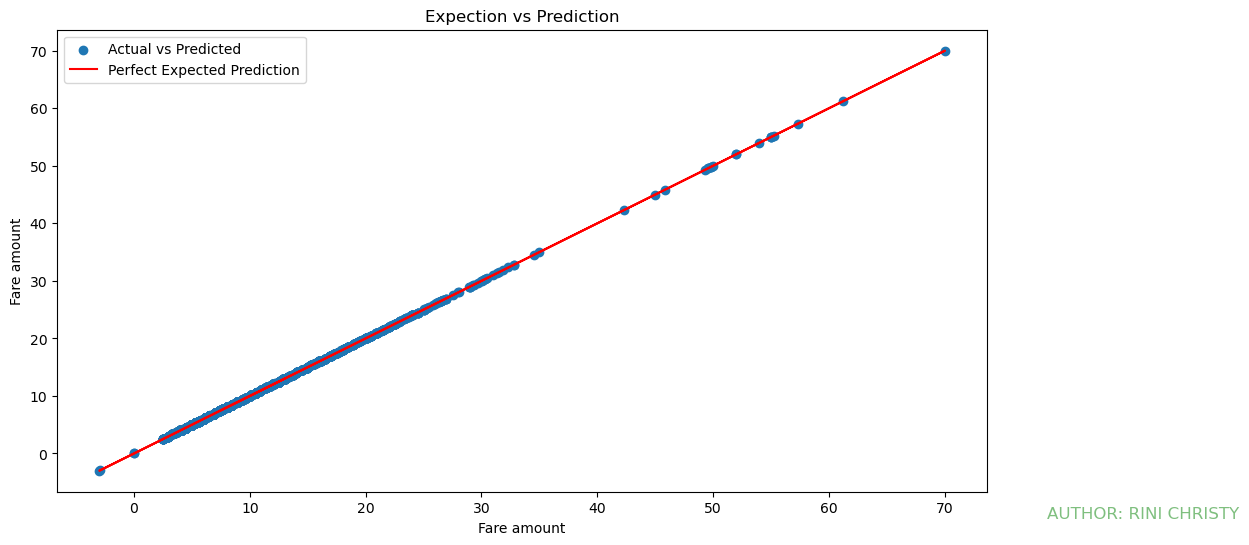

In [33]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit (X_train, y_train)
Yhat_lr = lr.predict(X_test)
model_train_evaluation(y_test, Yhat_lr, 'Linear regression Model')